In [34]:
import datetime
from matplotlib import pyplot as plt

In [54]:
data = '''Level 21 @ 2023-12-10 14:31:10.420 # 1000
Level 22 @ 2023-12-10 14:31:10.421 # 1000
Level 21 @ 2023-12-10 14:31:10.447 # 1000
Level 22 @ 2023-12-10 14:31:10.449 # 1000
Level 21 @ 2023-12-10 14:31:10.481 # 1000
Level 22 @ 2023-12-10 14:31:10.482 # 1000
Level 21 @ 2023-12-10 14:31:10.511 # 1000
Level 22 @ 2023-12-10 14:31:10.512 # 1000
Level 21 @ 2023-12-10 14:31:10.538 # 1000
Level 22 @ 2023-12-10 14:31:10.540 # 1000
Level 21 @ 2023-12-10 14:31:10.560 # 1000
Level 22 @ 2023-12-10 14:31:10.564 # 1000
Level 22 @ 2023-12-10 14:31:10.589 # 1000
Level 21 @ 2023-12-10 14:31:10.603 # 1000
Level 22 @ 2023-12-10 14:31:10.609 # 1000
Level 21 @ 2023-12-10 14:31:10.633 # 1000
Level 22 @ 2023-12-10 14:31:10.635 # 1000
Level 21 @ 2023-12-10 14:31:10.657 # 1000
Level 22 @ 2023-12-10 14:31:10.660 # 1000
Level 21 @ 2023-12-10 14:31:10.679 # 1000
Level 22 @ 2023-12-10 14:31:10.683 # 1000
Level 21 @ 2023-12-10 14:31:10.706 # 1000
Level 22 @ 2023-12-10 14:31:10.710 # 1000
Level 21 @ 2023-12-10 14:31:10.728 # 1000
Level 22 @ 2023-12-10 14:31:10.735 # 1000
Level 21 @ 2023-12-10 14:31:10.754 # 1000
Level 22 @ 2023-12-10 14:31:10.759 # 1000
Level 21 @ 2023-12-10 14:31:10.782 # 1000
Level 21 @ 2023-12-10 14:31:10.790 # 1000
Level 22 @ 2023-12-10 14:31:10.791 # 1000
Level 21 @ 2023-12-10 14:31:10.816 # 1000
Level 22 @ 2023-12-10 14:31:10.820 # 1000
Level 21 @ 2023-12-10 14:31:10.841 # 1000
Level 22 @ 2023-12-10 14:31:10.844 # 1000
Level 21 @ 2023-12-10 14:31:10.879 # 1000
Level 22 @ 2023-12-10 14:31:10.879 # 1000
Level 21 @ 2023-12-10 14:31:10.910 # 1000
Level 22 @ 2023-12-10 14:31:10.910 # 1000
Level 21 @ 2023-12-10 14:31:10.941 # 1000
Level 22 @ 2023-12-10 14:31:10.942 # 1000
Level 21 @ 2023-12-10 14:31:10.963 # 1000
Level 22 @ 2023-12-10 14:31:10.967 # 1000
Level 21 @ 2023-12-10 14:31:11.008 # 1000
Level 22 @ 2023-12-10 14:31:11.011 # 1000
Level 21 @ 2023-12-10 14:31:11.046 # 1000
Level 22 @ 2023-12-10 14:31:11.047 # 1000
Level 22 @ 2023-12-10 14:31:11.076 # 1000
Level 21 @ 2023-12-10 14:31:11.079 # 1000
Level 22 @ 2023-12-10 14:31:11.111 # 1000
Level 22 @ 2023-12-10 14:31:11.168 # 1000
Level 22 @ 2023-12-10 14:31:11.216 # 1000
Level 21 @ 2023-12-10 14:31:11.242 # 1000
Level 22 @ 2023-12-10 14:31:11.273 # 1000
Level 22 @ 2023-12-10 14:31:11.381 # 1000
Level 21 @ 2023-12-10 14:31:11.390 # 1000
Level 22 @ 2023-12-10 14:31:11.429 # 1000
Level 21 @ 2023-12-10 14:31:11.454 # 1000
Level 22 @ 2023-12-10 14:31:11.464 # 1000
Level 22 @ 2023-12-10 14:31:11.506 # 1000
Level 21 @ 2023-12-10 14:31:11.553 # 1000
Level 22 @ 2023-12-10 14:31:11.554 # 1000
Level 22 @ 2023-12-10 14:31:11.620 # 1000
Level 21 @ 2023-12-10 14:31:11.655 # 1000
Level 22 @ 2023-12-10 14:31:11.691 # 1000
Level 21 @ 2023-12-10 14:31:11.777 # 1000
Level 22 @ 2023-12-10 14:31:11.778 # 1000
Level 22 @ 2023-12-10 14:31:11.816 # 1000
Level 21 @ 2023-12-10 14:31:11.857 # 1000
Level 22 @ 2023-12-10 14:31:11.893 # 1000
Level 21 @ 2023-12-10 14:31:11.935 # 1000
Level 22 @ 2023-12-10 14:31:11.971 # 1000
Level 21 @ 2023-12-10 14:31:12.000 # 1000
Level 21 @ 2023-12-10 14:31:12.037 # 1000
Level 22 @ 2023-12-10 14:31:12.038 # 1000
Level 22 @ 2023-12-10 14:31:12.073 # 1000
Level 21 @ 2023-12-10 14:31:12.078 # 1000
Level 21 @ 2023-12-10 14:31:12.109 # 1000
Level 22 @ 2023-12-10 14:31:12.110 # 1000
Level 22 @ 2023-12-10 14:31:12.153 # 1000
Level 21 @ 2023-12-10 14:31:12.161 # 1000
Level 22 @ 2023-12-10 14:31:12.196 # 1000
Level 21 @ 2023-12-10 14:31:12.235 # 1000
Level 21 @ 2023-12-10 14:31:12.276 # 1000
Level 22 @ 2023-12-10 14:31:12.277 # 1000
Level 21 @ 2023-12-10 14:31:12.313 # 1000
Level 22 @ 2023-12-10 14:31:12.315 # 1000
Level 22 @ 2023-12-10 14:31:12.351 # 1000
Level 21 @ 2023-12-10 14:31:12.360 # 1000
Level 21 @ 2023-12-10 14:31:12.391 # 1000
Level 22 @ 2023-12-10 14:31:12.392 # 1000
Level 22 @ 2023-12-10 14:31:12.428 # 1000
Level 21 @ 2023-12-10 14:31:12.434 # 1000
Level 21 @ 2023-12-10 14:31:12.459 # 1000
Level 22 @ 2023-12-10 14:31:12.461 # 1000
Level 22 @ 2023-12-10 14:31:12.489 # 1000
Level 21 @ 2023-12-10 14:31:12.494 # 1000
Level 21 @ 2023-12-10 14:31:12.533 # 1000
Level 22 @ 2023-12-10 14:31:12.534 # 1000
Level 21 @ 2023-12-10 14:31:12.563 # 1000
Level 22 @ 2023-12-10 14:31:12.565 # 1000
Level 21 @ 2023-12-10 14:31:12.590 # 1000
Level 22 @ 2023-12-10 14:31:12.591 # 1000
Level 21 @ 2023-12-10 14:31:12.632 # 1000
Level 22 @ 2023-12-10 14:31:12.633 # 1000
Level 21 @ 2023-12-10 14:31:12.670 # 1000
Level 22 @ 2023-12-10 14:31:12.671 # 1000
Level 21 @ 2023-12-10 14:31:12.698 # 1000
Level 22 @ 2023-12-10 14:31:12.699 # 1000
Level 21 @ 2023-12-10 14:31:12.728 # 1000
Level 22 @ 2023-12-10 14:31:12.729 # 1000
Level 21 @ 2023-12-10 14:31:12.773 # 1000'''

In [58]:
def analyse(data:str) -> tuple:
    time_received = []
    time_inserted = []
    value_received = []
    value_inserted = []
    for line in data.strip().split("\n"):
        if line.startswith('Level 21'):
            time = line[11:34]
            time = datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S.%f')
            time_received.append(time)
            value = int(line[37:])
            value_received.append(value)
        if line.startswith('Level 22'):
            time = line[11:34]
            time = datetime.datetime.strptime(time,'%Y-%m-%d %H:%M:%S.%f')
            time_inserted.append(time)
            value = int(line[37:])
            value_inserted.append(value)
    time_received_ms = []
    time_inserted_ms = []
    for i in range(len(time_received)):
        delta = time_received[i]-time_received[0]
        time_received_ms.append((delta.microseconds + 1e6*delta.seconds)/1e3)
    for i in range(len(time_inserted)):
        delta = time_inserted[i]-time_inserted[0]
        time_inserted_ms.append((delta.microseconds + 1e6*delta.seconds)/1e3)
    value_received_sum = [sum(value_received[:i+1]) for i in range(len(value_received))]
    value_inserted_sum = [sum(value_inserted[:i+1]) for i in range(len(value_inserted))]
    return ((time_received_ms,value_received_sum),(time_inserted_ms,value_inserted_sum))

In [70]:
with open('postmongo_amqp.log','r',encoding='utf-8') as f:
    pika_data = f.read()

with open('postmongo_socket.log','r',encoding='utf-8') as f:
    socket_data = f.read()

pika = analyse(pika_data)
socket = analyse(socket_data)

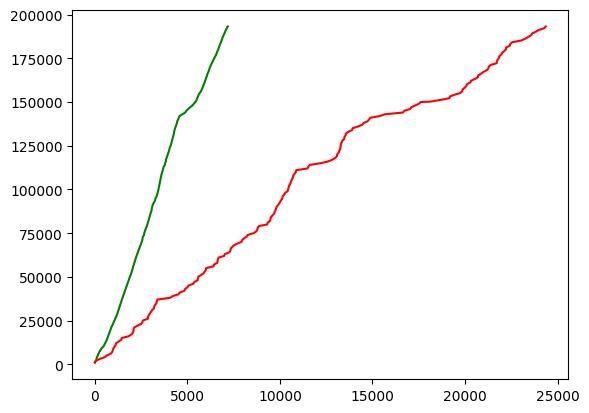

In [71]:
plt.plot(*(pika[0]),color='green')
plt.plot(*(socket[0]),color='red')

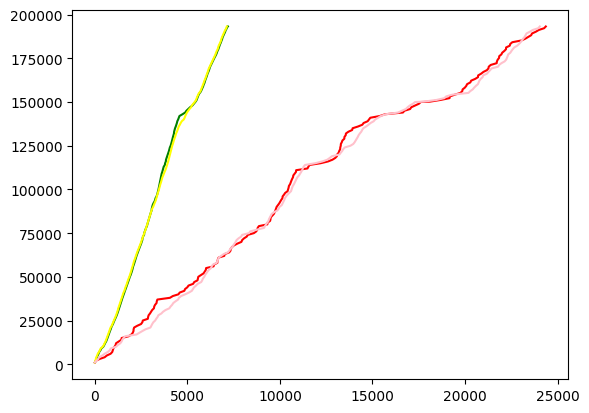

In [73]:
plt.plot(*(pika[0]),color='green')
plt.plot(*(socket[0]),color='red')